### Load packages / data

**Note:** Requires `Econ Sans Cnd` font which can be obtained from the R packages `hrbrthemes` (https://github.com/hrbrmstr/hrbrthemes)

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Define font settings
econ_font = {'fontname': 'Econ Sans Cnd', 'size': '11'}
econ_font_light = {'fontname': 'Econ Sans Cnd', 'size': '10', 'weight': 'light'}
econ_font_title = {'fontname': 'Econ Sans Cnd', 'size': '12', 'weight': 'bold'}

sample_data = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
sample_data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


### Visualisation

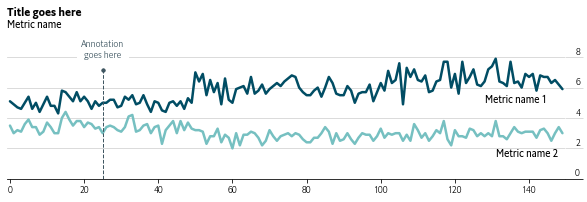

In [12]:
ax = sample_data.plot(
    y = ['sepal_length', 'sepal_width'], 
    figsize = (10, 2.5),
    linewidth = 2.5,
    color = ['#014d64', '#76c0c1'],
    solid_capstyle = 'round'
)

# Format x-axis values
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Econ Sans Cnd')
    label.set_fontweight('light')
    label.set_fontsize(10)

# Format y-axis values
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))

# Remove margin and x-axis label (not always appropriate)
ax.legend().set_visible(False)
ax.set(xlabel = '')

# Set small margin to the left and right of graph
ax.autoscale(True)
ax.margins(0.005)

# Clean up layout of graph, removing borders
ax.yaxis.grid(True)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Move y-axis to right hand side and recolour
ax.yaxis.tick_right()
ax.yaxis.set_label_position('right')
ax.yaxis.grid(color = 'lightgrey')
ax.tick_params(axis = 'y', which = 'major', color = 'lightgrey', length = 18, pad = -10)

ax.set_ylim([0, ax.get_ylim()[1] + 0.01])

# Ensure x-axis tick is black
ax.set_yticklabels([])
ax.get_yticklines()[1].set_color('black')

# Add y-axis tick labels
tick_locations = list(ax.get_yticks())[::1]
for i in range(0, len(tick_locations)):
    ax.text(
        ax.get_xlim()[1] + 4,
        tick_locations[i] + 0.2,
        "{:,.0f}".format(tick_locations[i]),
        horizontalalignment = 'right',
        **econ_font_light
    )

ax.set_ylim([0, ax.get_ylim()[1] + 1])
    
# Add y-axis titles
ax.text(
    ax.get_xlim()[0],
    ax.get_ylim()[1] + 1.8,
    'Title goes here',
    horizontalalignment = 'left',
    **econ_font_title
)
ax.text(
    ax.get_xlim()[0],
    ax.get_ylim()[1] + 1,
    'Metric name',
    horizontalalignment = 'left',
    **econ_font
)

# Add legends manually
ax.text(
    ax.get_xlim()[1] - 5,
    5,
    'Metric name 1',
    horizontalalignment = 'right',
    **econ_font
)
ax.text(
    ax.get_xlim()[1] - 2,
    1.5,
    'Metric name 2',
    horizontalalignment = 'right',
    **econ_font
)

# Added dotted line
dotted_line_intercept = 25
ax.axvline(
    x = dotted_line_intercept,
    ymax = 0.8,
    linestyle = '--', 
    color = '#3F5661', 
    linewidth = 1,
    marker = '.',
    markevery = [1, 1]
)
ax.text(
    dotted_line_intercept,
    8,
    'Annotation\ngoes here',
    color = '#3F5661',
    horizontalalignment = 'center',
    backgroundcolor = 'white',
    **econ_font_light
)

plt.savefig('example_graph.png', bbox_inches = 'tight', dpi = 300)